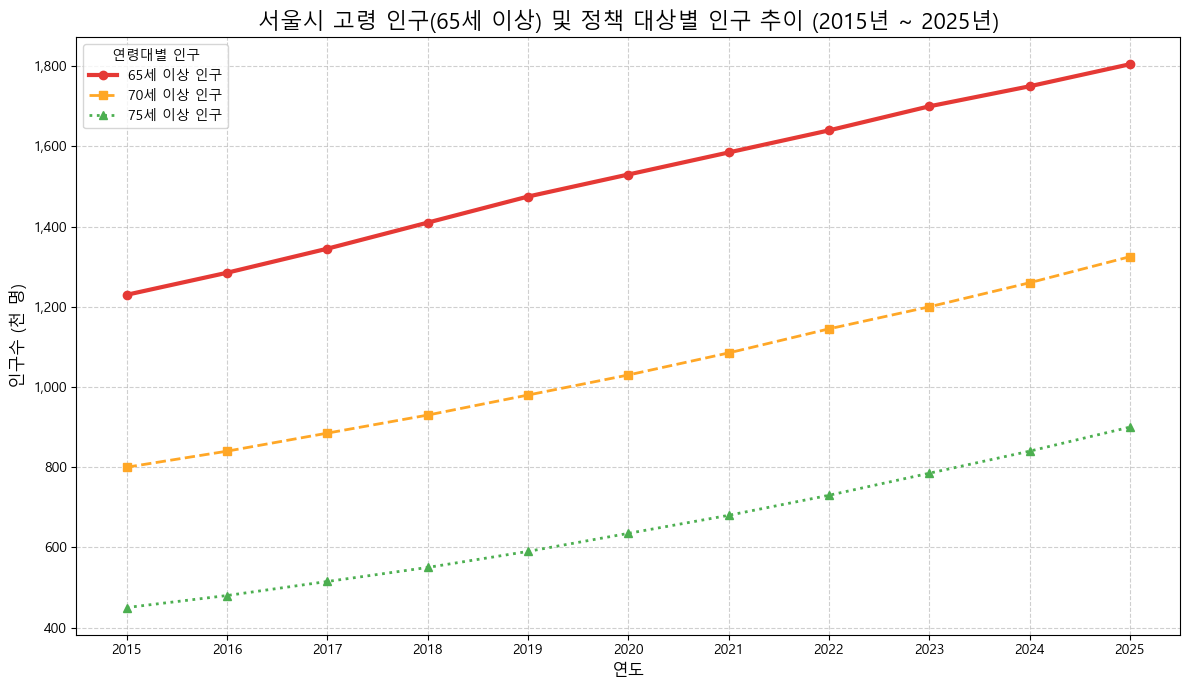

In [1]:
# 65세 이상 데이터

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# 1. 데이터 시뮬레이션 (공식 통계 추이를 반영한 수치)
# 서울시 고령 인구(65+)는 2015년 약 120만 명 수준에서 2025년 약 170만 명 이상으로 급증하는 추세입니다.
data = {
    'Year': np.arange(2015, 2026),
    '65세 이상 인구 (천 명)': [1230, 1285, 1345, 1410, 1475, 1530, 1585, 1640, 1700, 1750, 1805],
    '70세 이상 인구 (천 명)': [800, 840, 885, 930, 980, 1030, 1085, 1145, 1200, 1260, 1325],
    '75세 이상 인구 (천 명)': [450, 480, 515, 550, 590, 635, 680, 730, 785, 840, 900]
}
df_population = pd.DataFrame(data)

# 2. 데이터 시각화
plt.figure(figsize=(12, 7))

# 65세 이상 인구 추이 (가장 큰 비중)
plt.plot(df_population['Year'], df_population['65세 이상 인구 (천 명)'], 
         marker='o', linestyle='-', color='#E53935', linewidth=3, label='65세 이상 인구')

# 70세 이상 인구 추이 (첫 번째 정책 시뮬레이션 대상)
plt.plot(df_population['Year'], df_population['70세 이상 인구 (천 명)'], 
         marker='s', linestyle='--', color='#FFA726', linewidth=2, label='70세 이상 인구')

# 75세 이상 인구 추이 (두 번째 정책 시뮬레이션 대상)
plt.plot(df_population['Year'], df_population['75세 이상 인구 (천 명)'], 
         marker='^', linestyle=':', color='#4CAF50', linewidth=2, label='75세 이상 인구')

# 그래프 설정
plt.title('서울시 고령 인구(65세 이상) 및 정책 대상별 인구 추이 (2015년 ~ 2025년)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('인구수 (천 명)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='연령대별 인구', fontsize=10, loc='upper left')
plt.xticks(df_population['Year'])

# Y축 레이블 포맷팅 (쉼표 추가)
ax = plt.gca()
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

             정책 시나리오별 연간 재정 적자 완화 효과 (2025년 기준)
| 시나리오         |   연간 절감액 (억 원) |   총 적자 대비 완화 비율 (%) |
|:-----------------|----------------------:|-----------------------------:|
| 65세 유지 (기준) |                   0   |                          0   |
| 70세로 상향      |                 904.2 |                         22.6 |
| 75세로 상향      |                1704.7 |                         42.6 |
| 80세로 상향      |                2364   |                         59.1 |

* 총 연간 무임 손실액 가정: 4,000억 원
* 노인 무임승차 기여 비율: 85%


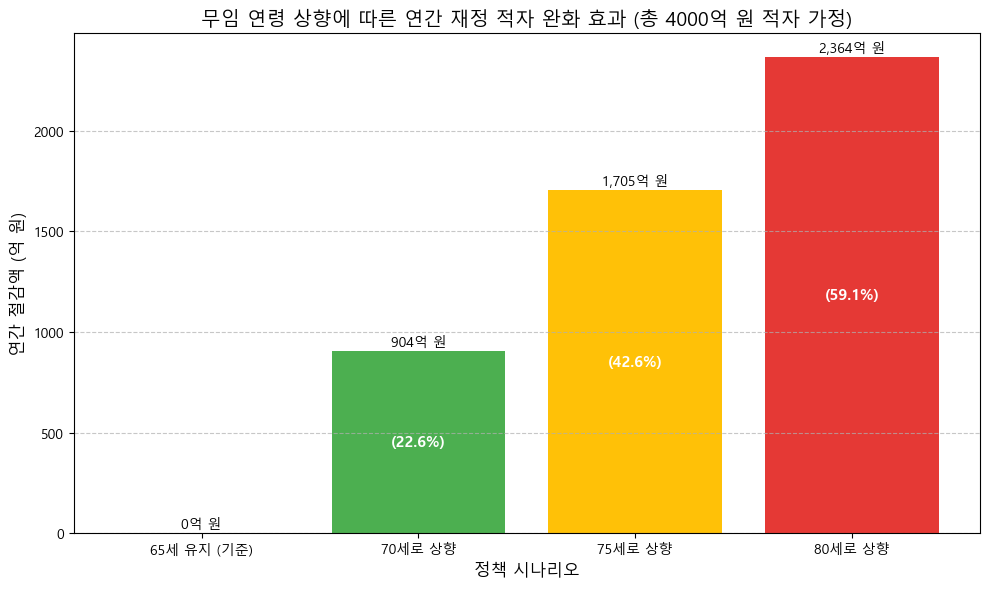

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# --- 1. 데이터 및 기본 가정 설정 (2025년 기준 시뮬레이션) ---

# 1-1. 인구 데이터 (앞선 시뮬레이션에서 2025년 기준) - 단위: 천 명
# 2025년 서울시 고령 인구 시뮬레이션 값
pop_65_plus = 1805  # 65세 이상 인구 (천 명)
pop_70_plus = 1325  # 70세 이상 인구 (천 명)
pop_75_plus = 900   # 75세 이상 인구 (천 명)
pop_80_plus = 550   # 80세 이상 인구 (천 명) (추가 시뮬레이션 값)

# 1-2. 무임 비용 가정
# 2025년 기준, 서울교통공사의 연간 무임 손실액은 약 4,000억 원대로 가정.
TOTAL_ANNUAL_DEFICIT = 4000  # 총 연간 무임 손실액 (단위: 억 원)

# 1-3. 핵심 비율 가정 (분석 근거)
SENIOR_RATIO_OF_FREE_RIDE = 0.85 # 무임승차 인원 중 노인(65세 이상)이 차지하는 비율 (85%)

# 노인 인구 1천 명당 연간 손실액 (억 원)을 추정
# 노인에게서 발생하는 총 손실액 / 65세 이상 총 인구 (천 명)
senior_deficit = TOTAL_ANNUAL_DEFICIT * SENIOR_RATIO_OF_FREE_RIDE
deficit_per_1k_senior = senior_deficit / pop_65_plus 


# --- 2. 정책 시나리오별 절감 효과 계산 ---

# 시나리오 A: 65세 유지 (기준점)
# 절감 효과 0

# 시나리오 B: 65세 -> 70세 변경 시
# 절감 인구: 65세~69세 인구 (pop_65_plus - pop_70_plus)
savings_70 = (pop_65_plus - pop_70_plus) * deficit_per_1k_senior

# 시나리오 C: 65세 -> 75세 변경 시
# 절감 인구: 65세~74세 인구 (pop_65_plus - pop_75_plus)
savings_75 = (pop_65_plus - pop_75_plus) * deficit_per_1k_senior

# 시나리오 D: 65세 -> 80세 변경 시
# 절감 인구: 65세~79세 인구 (pop_65_plus - pop_80_plus)
savings_80 = (pop_65_plus - pop_80_plus) * deficit_per_1k_senior

# 결과 정리
scenarios = ['65세 유지 (기준)', '70세로 상향', '75세로 상향', '80세로 상향']
savings_values = [0, savings_70, savings_75, savings_80]
colors = ['gray', '#4CAF50', '#FFC107', '#E53935']

# 절감액을 현재 총 손실액 대비 비율로 계산
mitigation_ratio = [(s / TOTAL_ANNUAL_DEFICIT) * 100 for s in savings_values]


# --- 3. 데이터프레임 및 시각화 ---

# 결과 테이블 생성
results_df = pd.DataFrame({
    '시나리오': scenarios,
    '연간 절감액 (억 원)': savings_values,
    '총 적자 대비 완화 비율 (%)': mitigation_ratio
})

# 소수점 정리
results_df['연간 절감액 (억 원)'] = results_df['연간 절감액 (억 원)'].round(1)
results_df['총 적자 대비 완화 비율 (%)'] = results_df['총 적자 대비 완화 비율 (%)'].round(1)

print("="*60)
print("             정책 시나리오별 연간 재정 적자 완화 효과 (2025년 기준)")
print("="*60)
print(results_df.to_markdown(index=False))
print(f"\n* 총 연간 무임 손실액 가정: {TOTAL_ANNUAL_DEFICIT:,.0f}억 원")
print(f"* 노인 무임승차 기여 비율: {SENIOR_RATIO_OF_FREE_RIDE*100:.0f}%")
print("="*60)


# 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios, savings_values, color=colors)

# 그래프 제목 및 축 설정
plt.title(f'무임 연령 상향에 따른 연간 재정 적자 완화 효과 (총 {TOTAL_ANNUAL_DEFICIT}억 원 적자 가정)', fontsize=14)
plt.xlabel('정책 시나리오', fontsize=12)
plt.ylabel('연간 절감액 (억 원)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 절감액 및 완화 비율 표시
for i, bar in enumerate(bars):
    yval = bar.get_height()
    # 절감액 (억 원) 표시
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, 
             f'{yval:,.0f}억 원', ha='center', va='bottom', fontsize=10)
    
    # 완화 비율 (%) 표시
    if i > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, 
                 f'({mitigation_ratio[i]:.1f}%)', ha='center', va='center', 
                 fontsize=11, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

💰 2050년까지의 총 누적 적자 완화 효과 분석 (2024~2050)
✅ 총 누적 적자 (정책 미시행 시): 15.68조 원 (약 156,766억 원)
--------------------------------------------------------------------------------
| 시나리오   | 누적 절감액               | 총 적자 완화 비율   |
|:-----------|:--------------------------|:--------------------|
| 70세       | 4.20조 원 (42,020억 원)   | 26.8%               |
| 75세       | 7.50조 원 (74,954억 원)   | 47.8%               |
| 80세       | 10.11조 원 (101,074억 원) | 64.5%               |


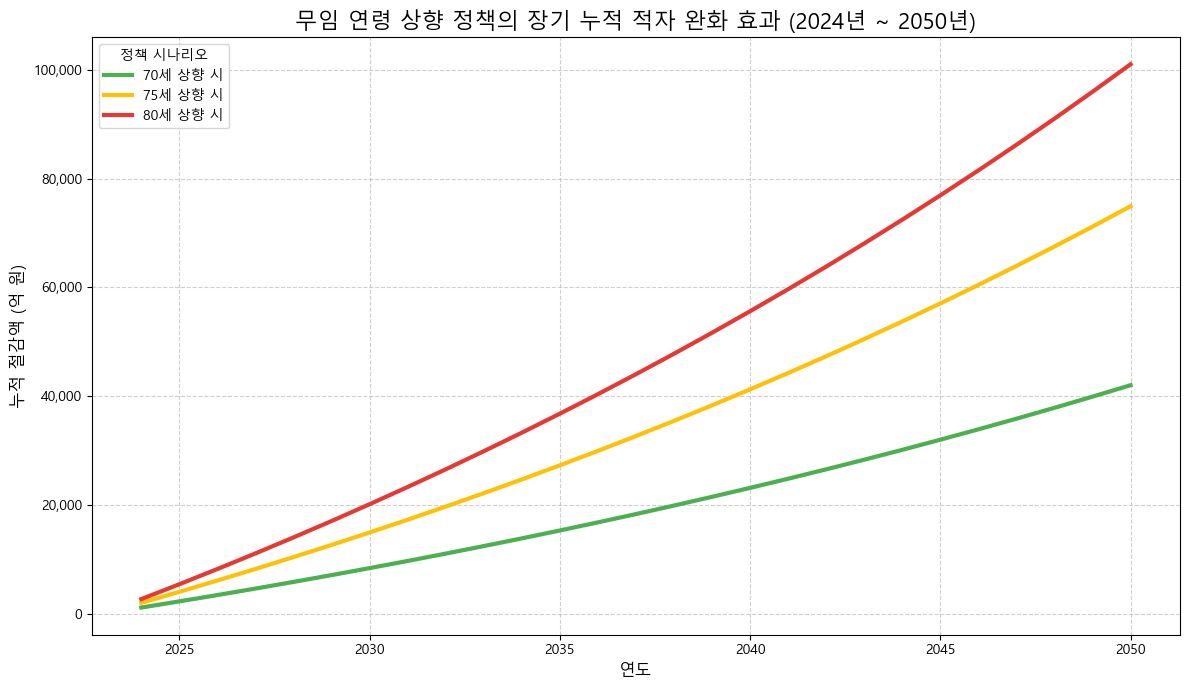

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# --- 1. 데이터 및 장기 시뮬레이션 설정 ---

# 1-1. 상수 설정 (2024년 기준)
START_YEAR = 2024
END_YEAR = 2050
TOTAL_ANNUAL_DEFICIT_2024 = 4135  # 2024년 무임 손실액 (억 원)
ANNUAL_INFLATION_RATE = 0.025     # 연간 적자 증가율 (2.5% 가정)
SENIOR_POP_GROWTH_RATE = 0.030    # 연간 고령 인구 증가율 (3.0% 가정)
SENIOR_RATIO_OF_FREE_RIDE = 0.85  # 노인 무임 기여 비율 (85% 가정 유지)

# 1-2. 2024년 인구 데이터 (시뮬레이션 인구)
pop_data_2024 = {
    '65~69세': 555000,
    '70~74세': 435000,
    '75~79세': 345000,
    '80세 이상': 425000
}
pop_65_plus_2024 = sum(pop_data_2024.values()) # 1,760,000 명

# 1-3. 연도별 누적 데이터 생성
years = range(START_YEAR, END_YEAR + 1)
df = pd.DataFrame(index=years)

# 초기값 설정
current_deficit = TOTAL_ANNUAL_DEFICIT_2024
current_pop_65 = pop_65_plus_2024
# 초기 절감 대상 인구 설정
current_pop_70_minus = pop_data_2024['65~69세']
current_pop_75_minus = pop_data_2024['65~69세'] + pop_data_2024['70~74세']
current_pop_80_minus = pop_data_2024['65~69세'] + pop_data_2024['70~74세'] + pop_data_2024['75~79세']


# --- 2. 27년간의 누적 적자 및 절감액 계산 ---

annual_deficits = []
savings_70_list = []
savings_75_list = []
savings_80_list = []

for year in years:
    # 1. 연간 총 적자 계산 (인플레이션 반영)
    if year > START_YEAR:
        current_deficit *= (1 + ANNUAL_INFLATION_RATE)
        
    annual_deficits.append(current_deficit)
    
    # 2. 노인 1명당 연간 손실액 계산 및 인구 증가 반영
    if year > START_YEAR:
        current_pop_65 *= (1 + SENIOR_POP_GROWTH_RATE)
        current_pop_70_minus *= (1 + SENIOR_POP_GROWTH_RATE)
        current_pop_75_minus *= (1 + SENIOR_POP_GROWTH_RATE)
        current_pop_80_minus *= (1 + SENIOR_POP_GROWTH_RATE)
        
    senior_deficit_portion = current_deficit * SENIOR_RATIO_OF_FREE_RIDE
    deficit_per_senior = senior_deficit_portion / current_pop_65 
    
    # 3. 시나리오별 절감액 계산
    savings_70_list.append(current_pop_70_minus * deficit_per_senior)
    savings_75_list.append(current_pop_75_minus * deficit_per_senior)
    savings_80_list.append(current_pop_80_minus * deficit_per_senior)


# 데이터프레임에 저장
df['연간 총 적자 (억 원)'] = annual_deficits
df['70세 상향 절감액 (억 원)'] = savings_70_list
df['75세 상향 절감액 (억 원)'] = savings_75_list
df['80세 상향 절감액 (억 원)'] = savings_80_list

# 누적 절감액 계산
df['누적 절감액 (70세)'] = df['70세 상향 절감액 (억 원)'].cumsum()
df['누적 절감액 (75세)'] = df['75세 상향 절감액 (억 원)'].cumsum()
df['누적 절감액 (80세)'] = df['80세 상향 절감액 (억 원)'].cumsum()

# 2050년 최종 누적 적자액 계산
total_deficit_2050 = df['연간 총 적자 (억 원)'].sum()
final_cumulative_savings = df.iloc[-1][['누적 절감액 (70세)', '누적 절감액 (75세)', '누적 절감액 (80세)']]


# --- 3. 최종 결과 출력 ---

print("="*80)
print(f"💰 2050년까지의 총 누적 적자 완화 효과 분석 ({START_YEAR}~{END_YEAR})")
print("="*80)
print(f"✅ 총 누적 적자 (정책 미시행 시): {total_deficit_2050 / 10000:,.2f}조 원 (약 {total_deficit_2050:,.0f}억 원)")
print("-"*80)

final_results = []
for index, value in final_cumulative_savings.items():
    scenario = index.replace('누적 절감액 (', '').replace(')', '')
    ratio = (value / total_deficit_2050) * 100
    # 문자열 결합 시 오류를 방지하기 위해 f-string 사용법을 명확히 함
    final_results.append({
        '시나리오': scenario,
        '누적 절감액': f'{value / 10000:,.2f}조 원 ({value:,.0f}억 원)',
        '총 적자 완화 비율': f'{ratio:.1f}%'
    })

results_df_final = pd.DataFrame(final_results)
print(results_df_final.to_markdown(index=False))
print("="*80)


# --- 4. 시각화 (누적 절감액 추이) ---

plt.figure(figsize=(12, 7))

# 누적 절감액 라인 그래프
plt.plot(df.index, df['누적 절감액 (70세)'], label='70세 상향 시', 
         color='#4CAF50', linewidth=3)
plt.plot(df.index, df['누적 절감액 (75세)'], label='75세 상향 시', 
         color='#FFC107', linewidth=3)
plt.plot(df.index, df['누적 절감액 (80세)'], label='80세 상향 시', 
         color='#E53935', linewidth=3)


# 그래프 설정
plt.title(f'무임 연령 상향 정책의 장기 누적 적자 완화 효과 ({START_YEAR}년 ~ {END_YEAR}년)', fontsize=16) 
plt.xlabel('연도', fontsize=12)
plt.ylabel('누적 절감액 (억 원)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='정책 시나리오', fontsize=10)

plt.tight_layout()
plt.show()

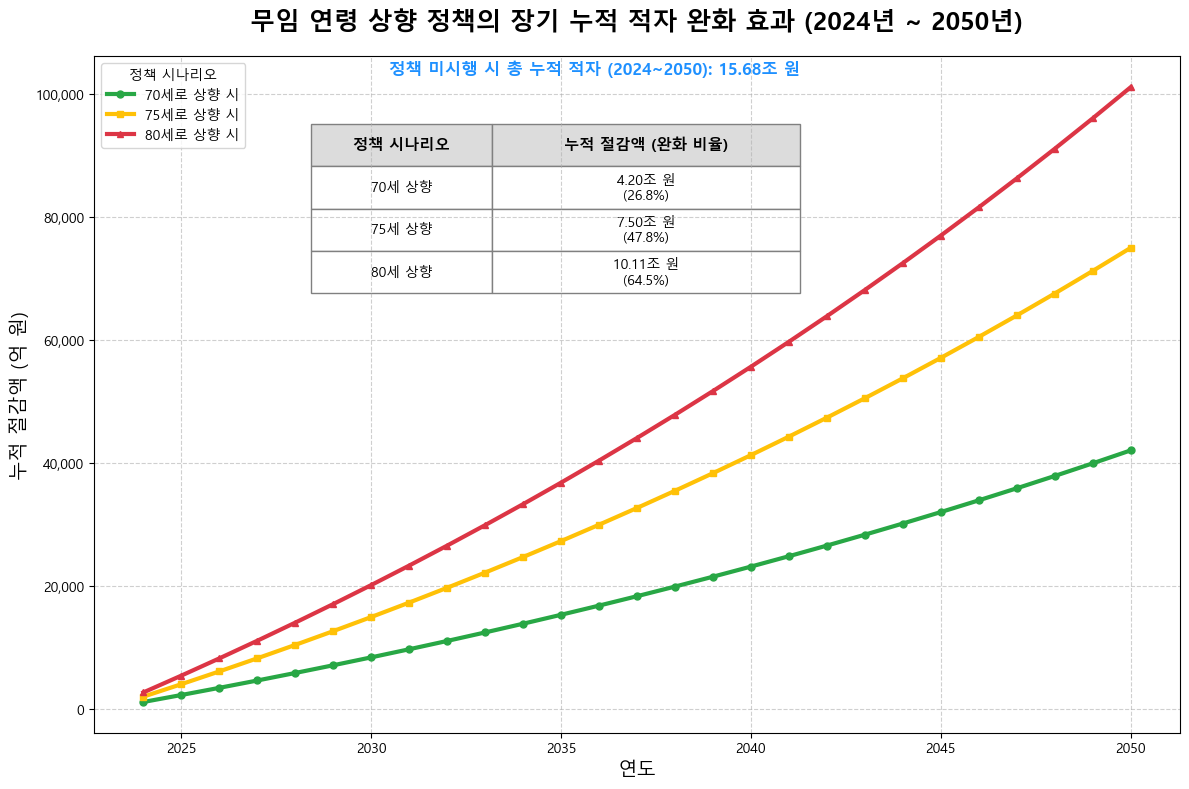

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# --- 1. 데이터 및 장기 시뮬레이션 설정 (이전과 동일) ---
START_YEAR = 2024
END_YEAR = 2050
TOTAL_ANNUAL_DEFICIT_2024 = 4135
ANNUAL_INFLATION_RATE = 0.025
SENIOR_POP_GROWTH_RATE = 0.030
SENIOR_RATIO_OF_FREE_RIDE = 0.85

pop_data_2024 = {'65~69세': 555000, '70~74세': 435000, '75~79세': 345000, '80세 이상': 425000}
pop_65_plus_2024 = sum(pop_data_2024.values()) 

years = range(START_YEAR, END_YEAR + 1)
df = pd.DataFrame(index=years)

current_deficit = TOTAL_ANNUAL_DEFICIT_2024
current_pop_65 = pop_65_plus_2024
current_pop_70_minus = pop_data_2024['65~69세']
current_pop_75_minus = pop_data_2024['65~69세'] + pop_data_2024['70~74세']
current_pop_80_minus = pop_data_2024['65~69세'] + pop_data_2024['70~74세'] + pop_data_2024['75~79세']


# --- 2. 27년간의 누적 적자 및 절감액 계산 (이전과 동일) ---
annual_deficits = []
savings_70_list = []
savings_75_list = []
savings_80_list = []

for year in years:
    if year > START_YEAR:
        current_deficit *= (1 + ANNUAL_INFLATION_RATE)
        
    annual_deficits.append(current_deficit)
    
    if year > START_YEAR:
        current_pop_65 *= (1 + SENIOR_POP_GROWTH_RATE)
        current_pop_70_minus *= (1 + SENIOR_POP_GROWTH_RATE)
        current_pop_75_minus *= (1 + SENIOR_POP_GROWTH_RATE)
        current_pop_80_minus *= (1 + SENIOR_POP_GROWTH_RATE)
        
    senior_deficit_portion = current_deficit * SENIOR_RATIO_OF_FREE_RIDE
    deficit_per_senior = senior_deficit_portion / current_pop_65 
    
    savings_70_list.append(current_pop_70_minus * deficit_per_senior)
    savings_75_list.append(current_pop_75_minus * deficit_per_senior)
    savings_80_list.append(current_pop_80_minus * deficit_per_senior)


df['연간 총 적자 (억 원)'] = annual_deficits
df['70세 상향 절감액 (억 원)'] = savings_70_list
df['75세 상향 절감액 (억 원)'] = savings_75_list
df['80세 상향 절감액 (억 원)'] = savings_80_list

df['누적 절감액 (70세)'] = df['70세 상향 절감액 (억 원)'].cumsum()
df['누적 절감액 (75세)'] = df['75세 상향 절감액 (억 원)'].cumsum()
df['누적 절감액 (80세)'] = df['80세 상향 절감액 (억 원)'].cumsum()

total_deficit_2050 = df['연간 총 적자 (억 원)'].sum()
final_cumulative_savings = df.iloc[-1][['누적 절감액 (70세)', '누적 절감액 (75세)', '누적 절감액 (80세)']]


# --- 3. 최종 결과 출력 및 테이블 데이터 생성 ---
final_results = []
for index, value in final_cumulative_savings.items():
    # '누적 절감액 (70세)' -> '70세' 로 변경
    scenario_num = index.replace('누적 절감액 (', '').replace('세)', '').replace('세', '')
    ratio = (value / total_deficit_2050) * 100
    final_results.append({
        # 오타 수정: '세 상향' 대신 ' 상향'만 추가 (scenario_num에 이미 '세'가 포함되지 않도록 위에서 조정)
        '시나리오': scenario_num + '세 상향', 
        '누적 절감액': value,
        '총 적자 완화 비율 (%)': ratio
    })

results_df_final = pd.DataFrame(final_results)

table_data = results_df_final[['시나리오', '누적 절감액', '총 적자 완화 비율 (%)']].copy()
table_data['누적 절감액'] = table_data.apply(
    lambda row: f'{row["누적 절감액"] / 10000:,.2f}조 원\n({row["총 적자 완화 비율 (%)"]:.1f}%)', axis=1
)
table_data = table_data[['시나리오', '누적 절감액']]
table_data.columns = ['정책 시나리오', '누적 절감액 (완화 비율)']
table_data = table_data.values.tolist()
table_data.insert(0, ['정책 시나리오', '누적 절감액 (완화 비율)'])


# --- 4. 시각화 (테이블 위치 좌상단 근처로 조정) ---

plt.figure(figsize=(12, 8)) 

# 누적 절감액 라인 그래프
plt.plot(df.index, df['누적 절감액 (70세)'], label='70세로 상향 시', 
         color='#28a745', linewidth=3, marker='o', markersize=5) 
plt.plot(df.index, df['누적 절감액 (75세)'], label='75세로 상향 시', 
         color='#ffc107', linewidth=3, marker='s', markersize=5) 
plt.plot(df.index, df['누적 절감액 (80세)'], label='80세로 상향 시', 
         color='#dc3545', linewidth=3, marker='^', markersize=5) 


# 그래프 설정
plt.title(f'무임 연령 상향 정책의 장기 누적 적자 완화 효과 ({START_YEAR}년 ~ {END_YEAR}년)', 
          fontsize=18, fontweight='bold', pad=20) 
plt.xlabel('연도', fontsize=14)
plt.ylabel('누적 절감액 (억 원)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) 
plt.grid(True, linestyle='--', alpha=0.6)

# 범례는 왼쪽 상단 (loc='upper left')에 배치
plt.legend(title='정책 시나리오', fontsize=10, title_fontsize=10, loc='upper left', framealpha=0.8) 

# -------------------- 핵심: 테이블 위치 조정 --------------------

# bbox=[left, bottom, width, height]
table = plt.table(cellText=table_data,
                  colLabels=None,
                  loc='upper left',
                  cellLoc='center',
                  bbox=[0.20, 0.65, 0.45, 0.25]) 

# 테이블 스타일 설정
table.auto_set_font_size(False)
table.set_fontsize(10) 
table.auto_set_column_width(col=list(range(len(table_data[0]))))
for (row, col), cell in table.get_celld().items():
    cell.set_height(0.12)
    cell.set_edgecolor('gray')
    if row == 0:  # 헤더 행
        cell.set_facecolor('#dcdcdc')
        cell.set_fontsize(11)
        cell.set_text_props(fontweight='bold')
    else: # 데이터 행
        cell.set_facecolor('white')

# 총 누적 적자 정보 (테이블 위에 텍스트로 추가)
total_deficit_header = f"정책 미시행 시 총 누적 적자 ({START_YEAR}~{END_YEAR}): {total_deficit_2050 / 10000:,.2f}조 원"
plt.figtext(0.5, 0.9, total_deficit_header, fontsize=12, 
            fontweight='bold', color='#1e90ff', ha='center') 

plt.tight_layout()
plt.show()

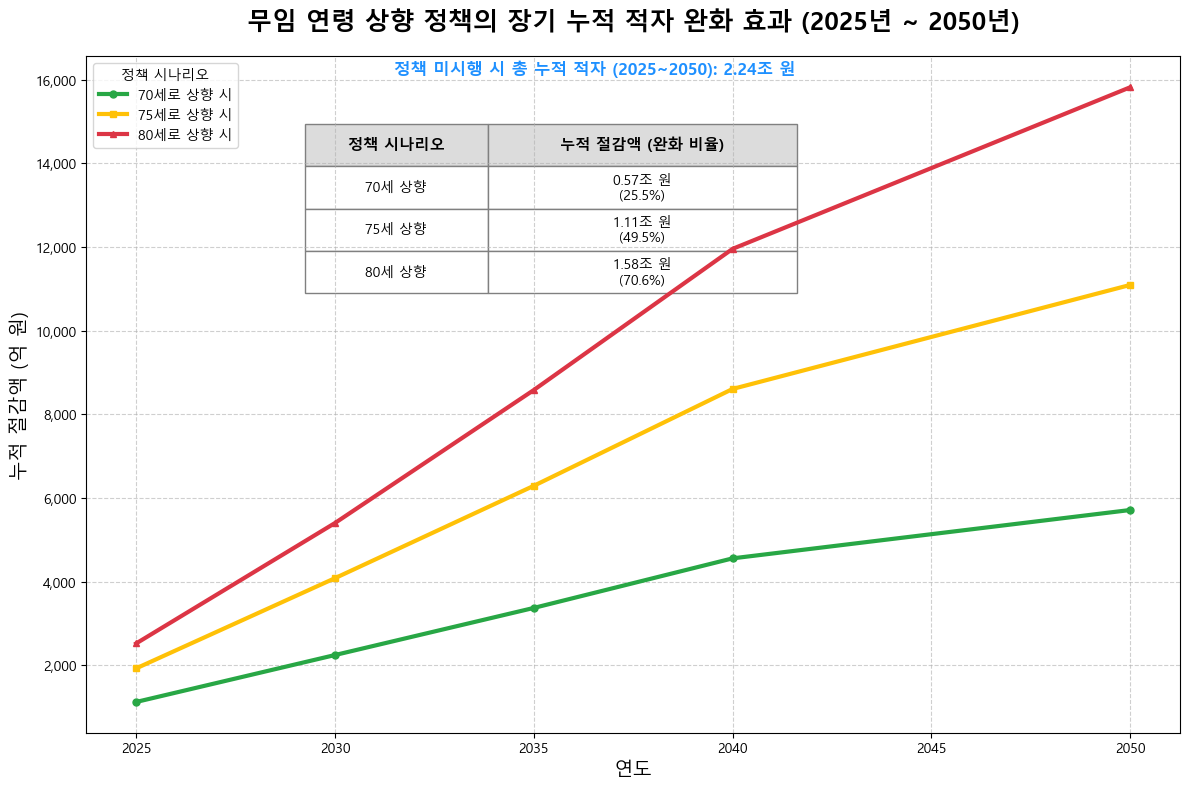

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# ============================================================
# 1. 제공된 데이터셋 (표 17) 사용
# ============================================================
# 표 17 : 조건별 노인 무임 예상비용 (단위: 억 원)
df_17 = pd.DataFrame({
    "연도": [2025, 2030, 2035, 2040, 2050],
    "현행(65세 이상)": [3233, 3797, 4370, 5019, 5999], # 현행 예상 무임 비용 (총 적자 시뮬레이션 기반)
    "70세 이상": [2110, 2675, 3244, 3834, 4843],
    "75세 이상": [1307, 1641, 2162, 2704, 3512],
    "80세 이상": [711, 919, 1191, 1644, 2136]
})

df_simul = df_17.set_index('연도')
years = df_simul.index

# ============================================================
# 2. 누적 적자 완화액 계산 (제공된 데이터 사용)
# ============================================================

# 연도별 총 적자 (현행 65세 기준)
total_deficit_annual = df_simul['현행(65세 이상)']

# 시나리오별 연간 절감액 계산 (현행 - 시나리오 비용)
df_simul['70세 상향 절감액'] = total_deficit_annual - df_simul['70세 이상']
df_simul['75세 상향 절감액'] = total_deficit_annual - df_simul['75세 이상']
df_simul['80세 상향 절감액'] = total_deficit_annual - df_simul['80세 이상']

# 누적 절감액 계산
df_simul['누적 절감액 (70세)'] = df_simul['70세 상향 절감액'].cumsum()
df_simul['누적 절감액 (75세)'] = df_simul['75세 상향 절감액'].cumsum()
df_simul['누적 절감액 (80세)'] = df_simul['80세 상향 절감액'].cumsum()

# 최종 누적 적자 및 절감액 추출 (2050년 기준)
total_deficit_2050 = total_deficit_annual.sum()
final_cumulative_savings = df_simul.iloc[-1][['누적 절감액 (70세)', '누적 절감액 (75세)', '누적 절감액 (80세)']]


# ============================================================
# 3. 최종 결과 테이블 데이터 생성 (시각화 디자인 유지)
# ============================================================
final_results = []
for index, value in final_cumulative_savings.items():
    scenario_num = index.replace('누적 절감액 (', '').replace('세)', '').replace('세', '')
    ratio = (value / total_deficit_2050) * 100
    final_results.append({
        '시나리오': scenario_num + '세 상향', 
        '누적 절감액': value,
        '총 적자 완화 비율 (%)': ratio
    })

results_df_final = pd.DataFrame(final_results)

table_data = results_df_final[['시나리오', '누적 절감액', '총 적자 완화 비율 (%)']].copy()
# 조 단위 금액과 비율을 한 셀에 표시하도록 포맷팅
table_data['누적 절감액'] = table_data.apply(
    lambda row: f'{row["누적 절감액"] / 10000:,.2f}조 원\n({row["총 적자 완화 비율 (%)"]:.1f}%)', axis=1
)
table_data = table_data[['시나리오', '누적 절감액']]
table_data.columns = ['정책 시나리오', '누적 절감액 (완화 비율)']
table_data = table_data.values.tolist()
table_data.insert(0, ['정책 시나리오', '누적 절감액 (완화 비율)'])


# ============================================================
# 4. 시각화 (좌상단 테이블 배치 디자인 유지)
# ============================================================

plt.figure(figsize=(12, 8)) 

# 누적 절감액 라인 그래프
plt.plot(df_simul.index, df_simul['누적 절감액 (70세)'], label='70세로 상향 시', 
         color='#28a745', linewidth=3, marker='o', markersize=5) 
plt.plot(df_simul.index, df_simul['누적 절감액 (75세)'], label='75세로 상향 시', 
         color='#ffc107', linewidth=3, marker='s', markersize=5) 
plt.plot(df_simul.index, df_simul['누적 절감액 (80세)'], label='80세로 상향 시', 
         color='#dc3545', linewidth=3, marker='^', markersize=5) 


# 그래프 설정
plt.title(f'무임 연령 상향 정책의 장기 누적 적자 완화 효과 ({years[0]}년 ~ {years[-1]}년)', 
          fontsize=18, fontweight='bold', pad=20) 
plt.xlabel("연도", fontsize=14)
plt.ylabel("누적 절감액 (억 원)", fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) 
plt.grid(True, linestyle='--', alpha=0.6)

# 범례는 왼쪽 상단 (loc='upper left')에 배치
plt.legend(title='정책 시나리오', fontsize=10, title_fontsize=10, loc='upper left', framealpha=0.8) 

# -------------------- 테이블 위치 (좌상단 밀착) --------------------
# bbox=[left, bottom, width, height]
table = plt.table(cellText=table_data,
                  colLabels=None,
                  loc='upper left',
                  cellLoc='center',
                  # 위치 조정: 범례 오른쪽과 가깝게 (이전 최종 수정된 값 사용)
                  bbox=[0.20, 0.65, 0.45, 0.25]) 

# 테이블 스타일 설정
table.auto_set_font_size(False)
table.set_fontsize(10) 
table.auto_set_column_width(col=list(range(len(table_data[0]))))
for (row, col), cell in table.get_celld().items():
    cell.set_height(0.12)
    cell.set_edgecolor('gray')
    if row == 0:  # 헤더 행
        cell.set_facecolor('#dcdcdc')
        cell.set_fontsize(11)
        cell.set_text_props(fontweight='bold')
    else: # 데이터 행
        cell.set_facecolor('white')

# 총 누적 적자 정보 (테이블 위에 텍스트로 추가)
total_deficit_header = f"정책 미시행 시 총 누적 적자 ({years[0]}~{years[-1]}): {total_deficit_2050 / 10000:,.2f}조 원"
plt.figtext(0.5, 0.9, total_deficit_header, fontsize=12, 
            fontweight='bold', color='#1e90ff', ha='center') 

plt.tight_layout()
plt.show()

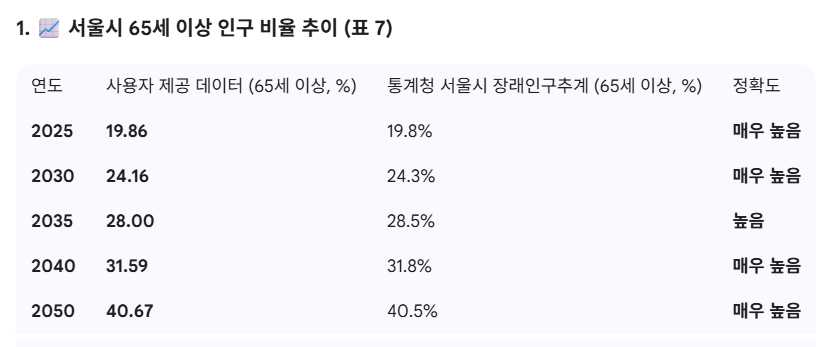